# ILest: Ionic Liquids Estimation and Statistical Tools
## How to use this GUI
Select ```Cell``` and choose ```Run All```.  This will execute the notebook cells and initialize the interactive widgets.

In [1]:
from ipywidgets import interact, interact_manual, HBox, VBox
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from visualization import core, plots
import utils

## Training a Model
The following set of widgets are useful to train a model from a specificied dataset.
You can save the model and its contents into a directory by specifying the name and using the ```Save Model``` button.
If the directory does not already exist it will be created. 

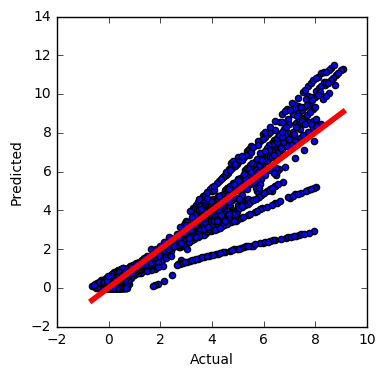

In [2]:
data_file = widgets.Text(description='Dataset',value='datasets/compounddata.xlsx',disabled=False)
model_select = widgets.Dropdown(options=core.model_types(),value='LASSO',description='Model:',disabled=False)
test_withheld = widgets.FloatText(value=20,description='% Test',disabled=False,color='black',width='130px')
save_file = widgets.Text(description='Save Folder:',placeholder='model_folder')
#save_toggle = widgets.Checkbox(description='Save?',value=True,disabled=False,)
run_button = widgets.Button(description='Train Model')
save_button = widgets.Button(description='Save Model')

obj_ = [None]
mod_data_ = [None,None]
X_mean_ = [None]
X_stdev_ = [None]
def run_event(b):
    clear_output()
    obj, X, y, X_mean, X_stdev = utils.train_model(model_select.value,data_file.value,float(test_withheld.value))
    obj_[0] = obj #save variable outside scope
    mod_data_[0] = X
    mod_data_[1] = y
    X_mean_[0] = X_mean
    X_stdev_[0] = X_stdev
    my_plot = plots.parity_plot(y,obj.predict(X))
    plt.show(my_plot)
    gui_1.children = [HBox(items1),HBox(items2)]
    
def save_event(b):
    utils.save_model(obj_[0],X_mean_,X_stdev_,X=mod_data_[0],y=mod_data_[1],dirname=save_file.value)
    
run_button.on_click(run_event)
save_button.on_click(save_event)
items1 = [data_file,test_withheld,model_select,run_button]
items2 = [save_file,save_button]
gui_1 = VBox(layout=widgets.Layout(width='95%',display='inline-flex'))
gui_1.children = [HBox(items1)]
display(gui_1)

## Visualizing Results from a Saved Model
To load a model for easy visualization simply put in the name of the directory where the contents were saved. Use the sliders to specify parameter values and chose the independent variable you wish to explore. The components A and B can be easily changed using the dropdown menus.

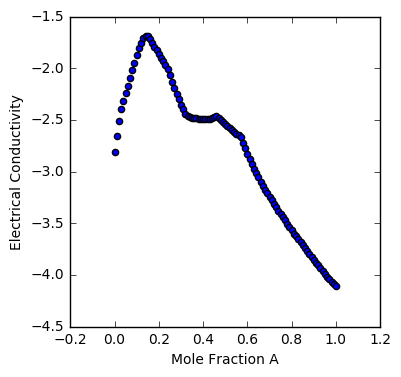

In [4]:
A_list,A_smiles,B_list,B_smiles = core.read_SMILES()
model_dir = widgets.Text(description='Model:',placeholder='model_folder')
load_button = widgets.Button(description='Load Model')    
a_select = widgets.Dropdown(options=A_list,description='A: ',width='550px')
b_select = widgets.Dropdown(options=B_list,description='B: ',width='400px')
temp_slider = widgets.IntSlider(value=298,min=250,max=400,step=1,orientation='horizontal',description='Temp (K)')
p_slider = widgets.IntSlider(value=103,min=80,max=150,step=1,orientation='horizontal',description='Pressure (kPa)')
m_slider = widgets.FloatSlider(value=0.50,min=0.0,max=1.0,step=0.01,orientation='horizontal',description='Mol Frac A')
plot_p_button = widgets.Button(description='Plot vs. Pressure',width='300px')
plot_t_button = widgets.Button(description='Plot vs. Temperature',width='300px')
plot_m_button = widgets.Button(description='Plot vs. Mole Fraction',width='300px')

mod_obj_ = [None]
X_ = [None]
y_ = [None]
X_mean_ = [None]
X_stdev_ = [None]
def load_event(b):
    clear_output()
    gui2.children = [HBox([model_dir,load_button],layout=widgets.Layout(width='95%',display='inline-flex')),
                     HBox([plot_t_button,plot_p_button,plot_m_button],
                          layout=widgets.Layout(width='95%',display='inline-flex')),
                     HBox([temp_slider,p_slider,m_slider]),HBox([a_select,b_select])]
    obj,X_mean,X_stdev,X,y = utils.read_model(model_dir.value)
    X_mean_[0] = X_mean
    X_stdev_[0] = X_stdev
    mod_obj_[0] = obj
    X_[0] = X
    y_[0] = y
    replot('m')

def p_button(b):
    replot(x_var='p')
def t_button(b):
    replot(x_var='t')
def m_button(b):
    replot(x_var='m')
    
def replot(x_var='m'):
    clear_output()
    a_idx = A_list.index(a_select.value)
    b_idx = B_list.index(b_select.value)
    x_vals,y_vals = utils.predict_model(A_smiles[a_idx],B_smiles[b_idx],mod_obj_[0],
                                        temp_slider.value,p_slider.value,m_slider.value,
                                        X_mean_[0],X_stdev_[0],flag=x_var)
    my_plot = plots.scatter_plot(x_vals,y_vals,x_var)
    plt.show(my_plot)
    
gui2 = VBox(layout=widgets.Layout(width='95%',display='inline-flex'))
gui2.children = [HBox([model_dir,load_button])]
display(gui2)

load_button.on_click(load_event)
plot_t_button.on_click(t_button)
plot_p_button.on_click(p_button)
plot_m_button.on_click(m_button)